In [202]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [157]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

In [26]:
IMG_SIZE = 256
BATCH_SIZE = 32

In [27]:
dataset = image_dataset_from_directory(
    "D:\Education\Projects\Potato-Disease-Classification-using-CNN\Data",
    shuffle = True,
    image_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [28]:
class_names = dataset.class_names

In [29]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

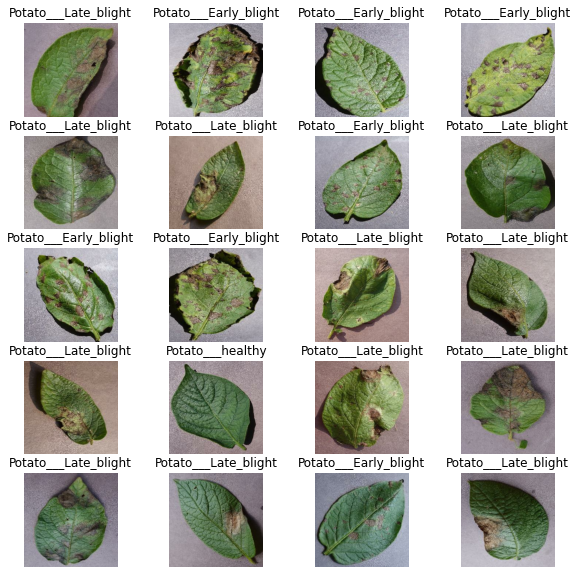

In [30]:
plt.figure(figsize=(10,10))
for img_batch, label_batch in dataset.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(img_batch[i].numpy().astype('uint8'))     
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [33]:
len(dataset)
# 68 * 32 => 2152

68

In [70]:
def data_split(dataset, train_size, test_size, val_size, shuffle=True, shuffle_size=1000):
    
    TRAIN_SIZE = int(len(dataset)*train_size)
    TEST_SIZE = int(len(dataset)*test_size)
    VAL_SIZE = int(len(dataset)*val_size)
    
    if shuffle:
        dataset.shuffle(shuffle_size)
    
    train_dataset = dataset.take(TRAIN_SIZE)   
    test_dataset = dataset.skip(TRAIN_SIZE).take(TEST_SIZE)    
    val_dataset = dataset.skip(TRAIN_SIZE).skip(VAL_SIZE)        
    return train_dataset, test_dataset, val_dataset

In [71]:
train_dataset, test_dataset, val_dataset = data_split(dataset, 0.8,0.1,0.1)

In [72]:
print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))

54
6
8


In [75]:
resize_rescale = keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1/255.0)
])

In [76]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [79]:
model = keras.Sequential([
    resize_rescale,
    data_augmentation,
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (IMG_SIZE,IMG_SIZE,)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(3, activation='softmax'),
])

In [82]:
model.compile(
    optimizer='adam',
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [87]:
fitting = model.fit(train_dataset, epochs=5, batch_size=BATCH_SIZE, validation_data=val_dataset)

Epoch 1/5
54/54 [==============================] - 309s 5s/step - loss: 0.1249 - accuracy: 0.9572 - val_loss: 0.0990 - val_accuracy: 0.9655
Epoch 2/5
54/54 [==============================] - 262s 5s/step - loss: 0.1032 - accuracy: 0.9659 - val_loss: 0.0663 - val_accuracy: 0.9784
Epoch 3/5
54/54 [==============================] - 252s 5s/step - loss: 0.1330 - accuracy: 0.9485 - val_loss: 0.1106 - val_accuracy: 0.9612
Epoch 4/5
54/54 [==============================] - 271s 5s/step - loss: 0.0829 - accuracy: 0.9682 - val_loss: 0.2440 - val_accuracy: 0.9052
Epoch 5/5
54/54 [==============================] - 318s 6s/step - loss: 0.0986 - accuracy: 0.9618 - val_loss: 0.1047 - val_accuracy: 0.9569


In [88]:
model.evaluate(test_dataset)

6/6 [==============================] - 13s 943ms/step - loss: 0.1673 - accuracy: 0.9323


[0.16734768450260162, 0.9322916865348816]

In [89]:
fitting.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [103]:
acc = fitting.history['accuracy']
val_acc = fitting.history['val_accuracy']

ls = fitting.history['loss']
val_ls = fitting.history['val_loss']

(0.8, 1.0)

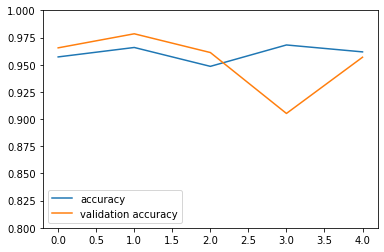

In [104]:
plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.legend()
plt.ylim((.8,1.0))

(0.0, 1.0)

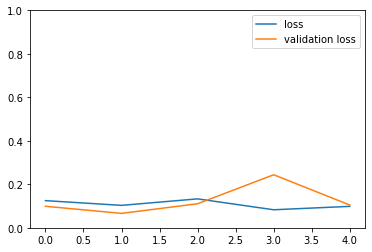

In [107]:
plt.plot(ls, label='loss')
plt.plot(val_ls, label='validation loss')
plt.legend()
plt.ylim((0,1))

In [196]:
def predict(data,n):
    plt.figure(figsize=(15,15))
    for img, label in data.take(n):
        for i in range(9):
            plt.subplot(3,3, i+1)
            plt.imshow(img[i].numpy().astype('uint8'))
            result = model.predict(tf.expand_dims(keras.preprocessing.image.img_to_array(img[i].numpy()),0))
            image_label = class_names[np.argmax(result)]
            confidance = round(np.max(result[0])*100.0, 2)
            plt.title(f'class: {image_label} confidance: {confidance}%')
            plt.axis('off')

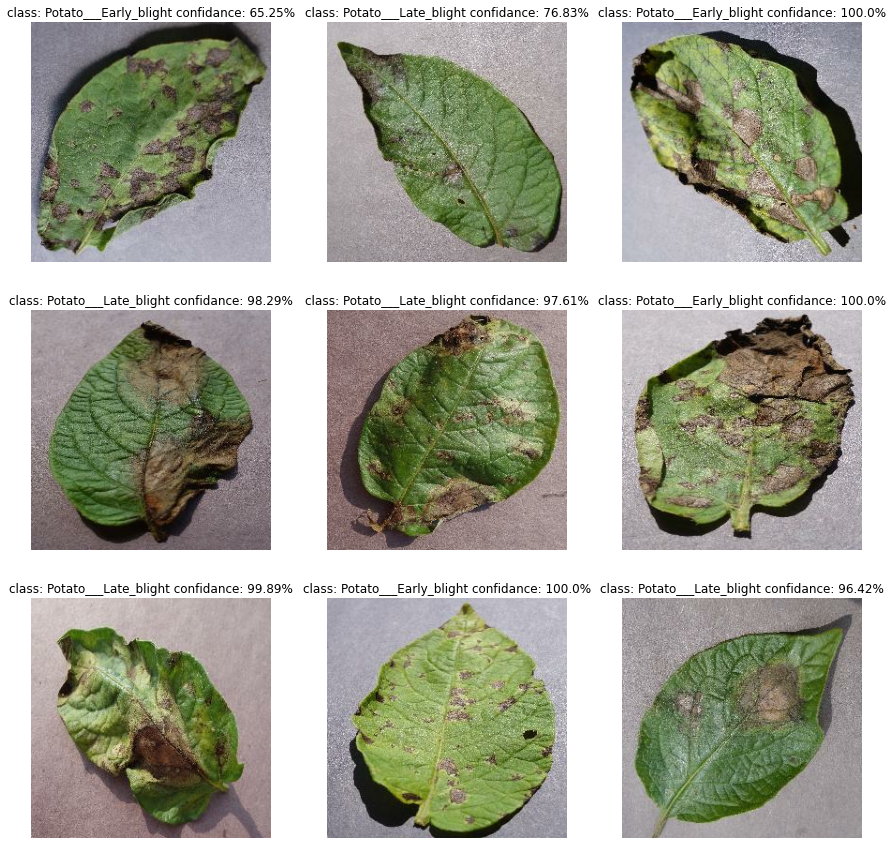

In [197]:
predict(test_dataset,3)